# Simple linear regression

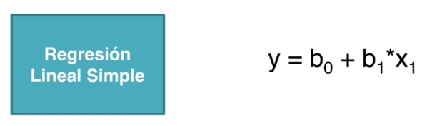

## import libraries

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Leer datos

In [4]:
df = pd.read_csv("C:/Users/Alex/Desktop/R/machine learning/0.dataset/Salary_Data.csv")
df.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 612.0 bytes


In [6]:
df.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


## ANALISIS EXPLORATORIO DE DATOS

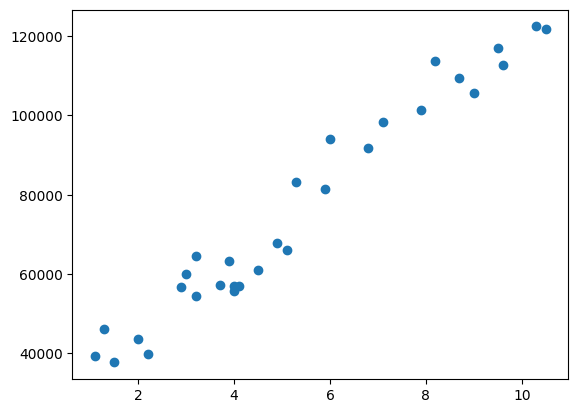

In [7]:
plt.scatter(df["YearsExperience"],df["Salary"])

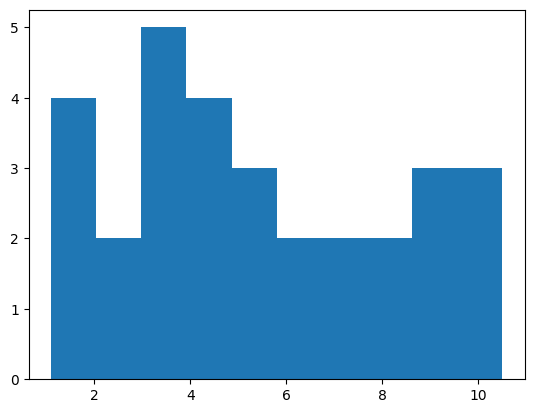

In [8]:
plt.hist(df["YearsExperience"])
plt.show()

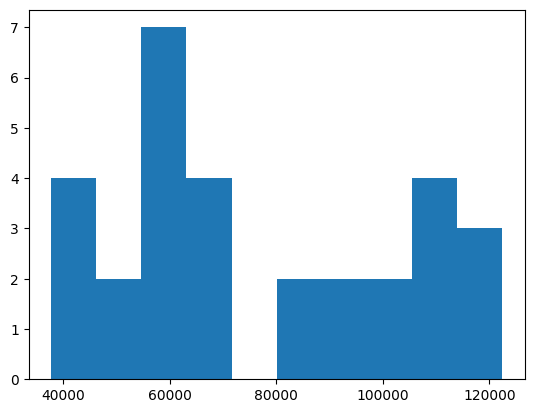

In [9]:
plt.hist(df["Salary"])
plt.show()

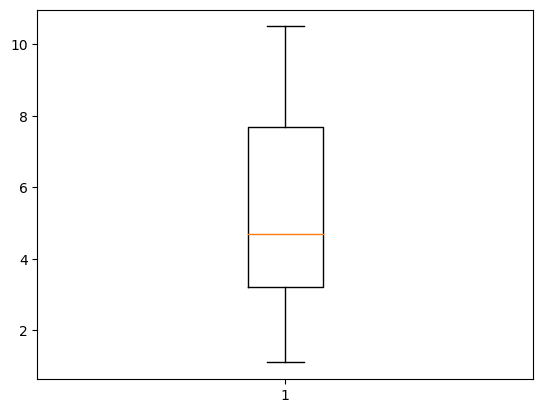

In [10]:
plt.boxplot(df["YearsExperience"])
plt.show()

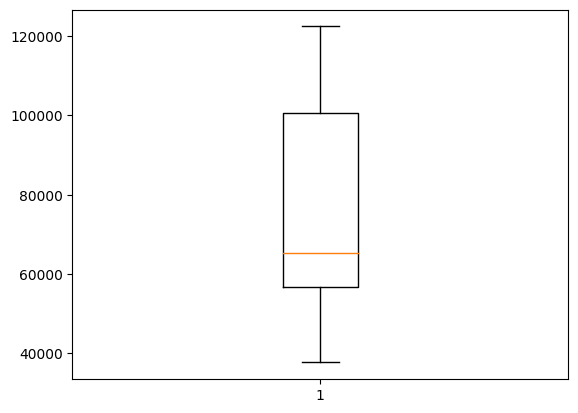

In [11]:
plt.boxplot(df["Salary"])
plt.show()

## Dividir dataset

In [12]:
X = df.drop("Salary",axis=1)
y = df["Salary"]

In [23]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1/3, random_state=0)

## Escalar los datos

In [14]:
# No es necesario realizar el escalado de las variables en una reg lineal
# from sklearn.preprocessing import StandardScaler
# df_scaler = StandardScaler()
# X_train = df_scaler.fit_transform(X_train)
# X_test = df_scaler.fit_transform(X_test)

##  Crear el modelo de regresion lineal

In [24]:
from sklearn.linear_model import LinearRegression
model = LinearRegression() # crear el modelo
model.fit(X_train, y_train) # entrenar el modelo

LinearRegression()

## Predecir el conjunto de test

In [25]:
y_pred = model.predict(X_test)

## graficar los resultados

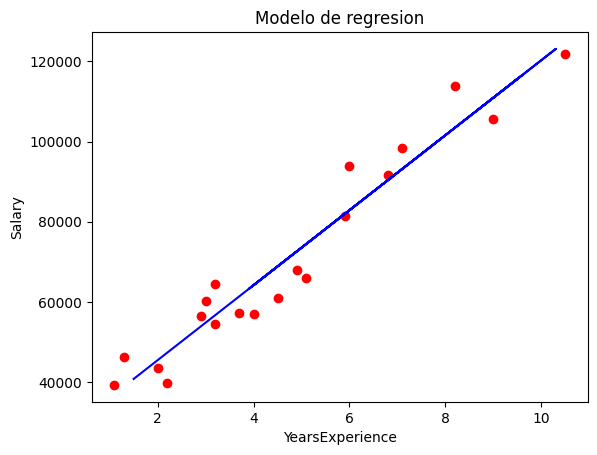

In [26]:
plt.scatter(X_train, y_train, color = "red") # graficar los puntos de los datos reales
plt.plot(X_test, y_pred, color = "blue") # graficar la recta de prediccion
plt.xlabel('YearsExperience')
plt.ylabel('Salary')
plt.title('Modelo de regresion')
plt.show()

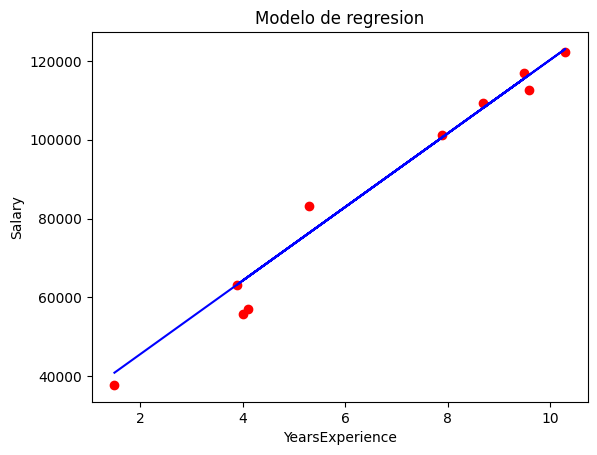

In [27]:
plt.scatter(X_test, y_test, color = "red") # graficar los puntos de los datos reales
plt.plot(X_test, y_pred, color = "blue") # graficar la recta de prediccion
plt.xlabel('YearsExperience')
plt.ylabel('Salary')
plt.title('Modelo de regresion')
plt.show()

In [33]:
# Imprimir los coeficientes
print(model.coef_)
# Imprimir el intercepto
print(model.intercept_)

[9345.94244312]
26816.192244031183


## Evaluar el modelo

1. R-squared (R^2): mide la proporción de la varianza de la variable objetivo que se explica por el modelo. Toma valores entre 0 y 1, donde 1 indica que el modelo explica toda la variabilidad y 0 indica que el modelo no explica nada.
2. Root Mean Squared Error (RMSE): es la raíz cuadrada del MSE y mide la cantidad de error en la misma unidad que la variable objetivo.
3. Mean Squared Error (MSE): mide el promedio de los errores al cuadrado entre las predicciones y los valores reales.
4. Mean Absolute Error (MAE): mide el promedio de la diferencia absoluta entre las predicciones y los valores reales. 

In [34]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from math import sqrt
from sklearn.metrics import r2_score

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"mae: {mae}")
print(f"mse: {mse}")
print(f"rmse: {rmse}")
print(f"r2: {r2}")

mae: 3426.4269374307078
mse: 21026037.329511296
rmse: 4585.4157204675885
r2: 0.9749154407708353


## Conclusiones

* Se observa que variable YearsExperience explica a la variable dependiente Salary en un 97%, lo cual nos indica que este modelo tiene un buen desempeño.